In [1]:
import pandas as pd
df = pd.read_csv('3dni_pogoda.csv')
df.index = df['Data czas']
df.drop(columns='Data czas', inplace = True)
df.head()

,Energia(t-3),Temp_zewn(t-3),V_wiatru(t-3),Wilg(t-3),Zachm(t-3),Energia(t-2),Temp_zewn(t-2),V_wiatru(t-2),Wilg(t-2),Zachm(t-2),...,Wilg(t-1),Zachm(t-1),Energia(t),Temp_zewn(t),V_wiatru(t),Wilg(t),Zachm(t),Dlug_dnia,Typ_dnia,Pora_roku
Data czas,,,,,,,,,,,,,,,,,,,,,
2016-01-04,93506.054,-3.691304,3.260870,78.565217,7.304348,112776.240,-9.341667,4.416667,70.083333,1.416667,...,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,7.517,1.0,4.0
2016-01-05,112776.240,-9.341667,4.416667,70.083333,1.416667,122962.116,-11.200000,3.708333,68.458333,0.041667,...,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,7.550,1.0,4.0
2016-01-06,122962.116,-11.200000,3.708333,68.458333,0.041667,125575.794,-9.908333,3.750000,55.125000,0.000000,...,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,7.583,5.0,4.0
2016-01-07,125575.794,-9.908333,3.750000,55.125000,0.000000,131745.917,-10.616667,1.916667,61.916667,1.333333,...,77.583333,0.125000,129980.459,-7.220833,2.791667,69.541667,5.916667,7.600,1.0,4.0
2016-01-08,131745.917,-10.616667,1.916667,61.916667,1.333333,135885.442,-11.320833,1.583333,77.583333,0.125000,...,69.541667,5.916667,113582.531,-1.837500,3.916667,90.416667,7.958333,7.650,2.0,4.0


In [2]:
X = df.drop('Energia(t)', axis=1)
y = df['Energia(t)']

In [3]:
X_train, X_test, y_train, y_test = X[:'2017-10-01'], X['2017-10-01':] ,y[:'2017-10-01'] ,y['2017-10-01':]

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)
scaler.fit(X_test)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [5]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [6]:
from sklearn.neural_network import MLPRegressor
'''from sklearn.metrics import mean_squared_error, explained_variance_score
import numpy as np

#alphas = np.logspace(-5, 5, 6)
momentums = range(1, 10, 1)
learning_rates = range(5, 30)

regressors = []
names = []

for lr in learning_rates:
    for m in momentums:
        regressors.append(MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=500,
                                       shuffle=False,
                                       activation='relu',
                                       alpha=100000, random_state=1,
                                       momentum=m/10,learning_rate_init=lr/10000))
        names.append('momentum {}, learning rate {}'.format(m/10, lr/10000))

for name, regressor in zip(names, regressors):
    regressor.fit(X_train,y_train)
    y_p = regressor.predict(X_test)
    print('Alpha {} R2 score: {}'.format(name, explained_variance_score(y_test, y_p)))
    print('Alpha {} mean squered error: {}'.format(name, mean_squared_error(y_test, y_p)))
    print('Alpha {} root mean squered error: {}'.format(name, np.sqrt(mean_squared_error(y_test, y_p))))'''

"from sklearn.metrics import mean_squared_error, explained_variance_score\nimport numpy as np\n\n#alphas = np.logspace(-5, 5, 6)\nmomentums = range(1, 10, 1)\nlearning_rates = range(5, 30)\n\nregressors = []\nnames = []\n\nfor lr in learning_rates:\n    for m in momentums:\n        regressors.append(MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=500,\n                                       shuffle=False,\n                                       activation='relu',\n                                       alpha=100000, random_state=1,\n                                       momentum=m/10,learning_rate_init=lr/10000))\n        names.append('momentum {}, learning rate {}'.format(m/10, lr/10000))\n\nfor name, regressor in zip(names, regressors):\n    regressor.fit(X_train,y_train)\n    y_p = regressor.predict(X_test)\n    print('Alpha {} R2 score: {}'.format(name, explained_variance_score(y_test, y_p)))\n    print('Alpha {} mean squered error: {}'.format(name, mean_squared_error(y_test

In [7]:
mlp = MLPRegressor(hidden_layer_sizes=(33, 33, 33),max_iter=1500,
                                       shuffle=False,
                                       activation='relu',
                                       alpha=100000, random_state=1,
                                       momentum=0.1,learning_rate_init=0.0028)
mlp.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=100000, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(33, 33, 33), learning_rate='constant',
       learning_rate_init=0.0028, max_iter=1500, momentum=0.1,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=False, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [8]:
y_pred = mlp.predict(X_test)

In [9]:
from sklearn.metrics import mean_squared_error, explained_variance_score
import numpy as np

print('R2 score: {}'.format(explained_variance_score(y_test, y_pred)))
print('Mean squered error: {}'.format(mean_squared_error(y_test, y_pred)))
print('Root mean squered error: {}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))

R2 score: 0.9536898643740946
Mean squered error: 15151652.743523095
Root mean squered error: 3892.51239478092


In [10]:
from pandas import Series

y_pred_df = pd.DataFrame(data=y_pred, index=X['2017-10-01':].index.values)

In [11]:
y_pred_df.index = pd.to_datetime(y_pred_df.index)

In [12]:
df.index = pd.to_datetime(df.index)

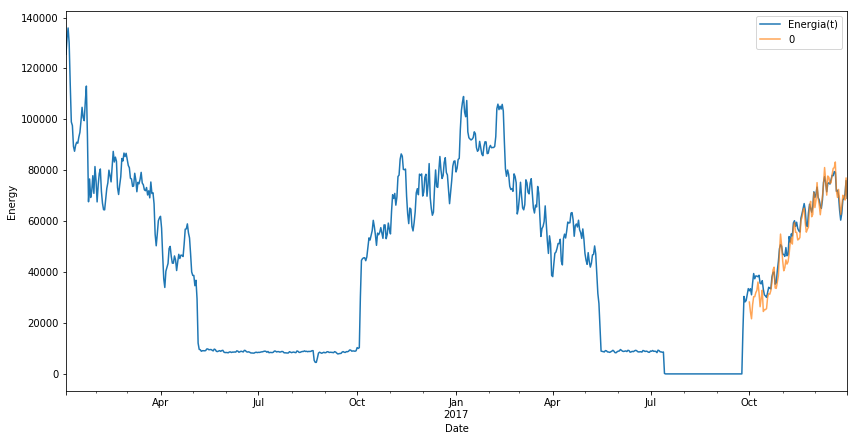

In [17]:
import matplotlib.pyplot as plt

ax = df['Energia(t)'].plot(figsize=(14, 7))
y_pred_df.plot(ax=ax, label='Predykcja', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.savefig('wykres.jpg')
plt.show()

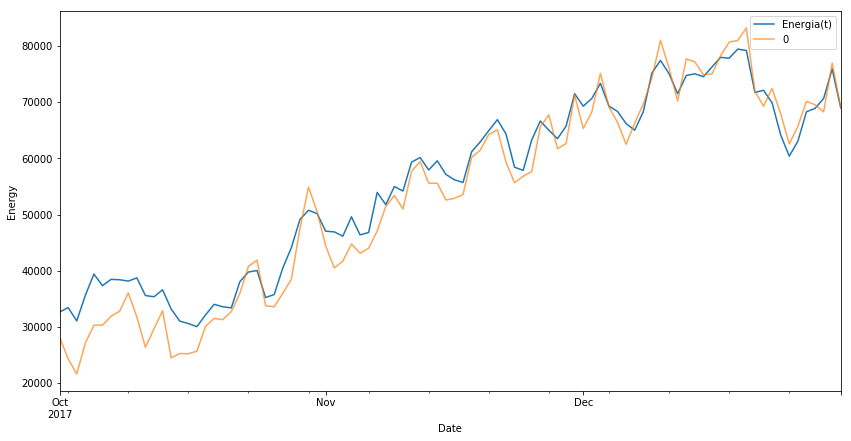

In [14]:
ax = df['Energia(t)'].loc['2017-10-01':].plot(figsize=(14, 7))
y_pred_df.plot(ax=ax, label='Predykcja', alpha=.7, figsize=(14, 7))

ax.set_xlabel('Date')
ax.set_ylabel('Energy')
plt.legend()

plt.savefig('wykres.jpg')
plt.show()

In [15]:
input_weights = np.abs(mlp.coefs_[0]).sum(axis=1)
input_weights = input_weights/np.linalg.norm(input_weights, ord=2, axis=0, keepdims=True)
input_weights_df = pd.DataFrame(input_weights).set_index(X.columns)
input_weights_df.rename(columns={ input_weights_df.columns[0]: 'Weight' }, inplace=True)

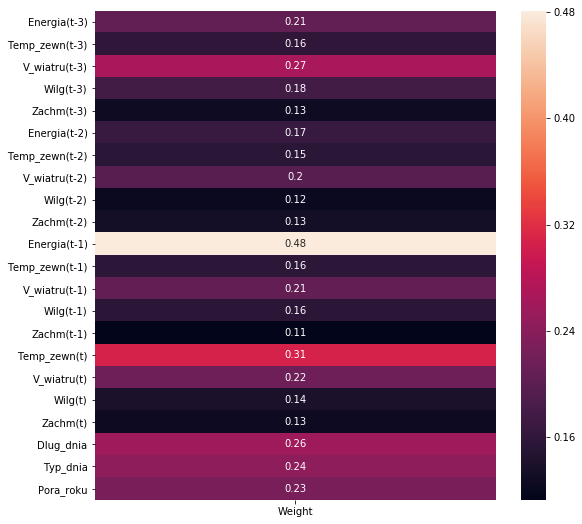

In [16]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(9,9))  
sns.heatmap(input_weights_df, annot=True)